In [146]:
import sklearn.linear_model as lm
import sklearn.ensemble as se
import sklearn.tree as tree
from sklearn import svm
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [147]:
from sklearn import preprocessing

y = df['neighbourhood_group']
X = df.drop(columns=['neighbourhood_group', 'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month'] )
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room
0,0.357393,0.511921,0.0149,0.000000,0.014308,0.015337,1.000000,1.0,0.0
1,0.614199,0.490469,0.0225,0.000000,0.071542,0.003067,0.972603,0.0,0.0
2,0.748252,0.569257,0.0150,0.001601,0.000000,0.000000,1.000000,1.0,0.0
3,0.448496,0.535649,0.0089,0.000000,0.429253,0.000000,0.531507,0.0,0.0
4,0.722820,0.565324,0.0080,0.007206,0.014308,0.000000,0.000000,0.0,0.0


In [148]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
    
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
    
# Predict the labels for test dataset
y_pred = clf.predict(X_test)

In [149]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df

,Actual,Predicted
18907,Queens,Queens
46663,Queens,Queens
19757,Brooklyn,Brooklyn
9705,Brooklyn,Brooklyn
3322,Manhattan,Manhattan
...,...,...
12360,Manhattan,Manhattan
46855,Brooklyn,Brooklyn
37553,Queens,Queens
15102,Manhattan,Manhattan


In [150]:
print(df['neighbourhood_group'].unique())


['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


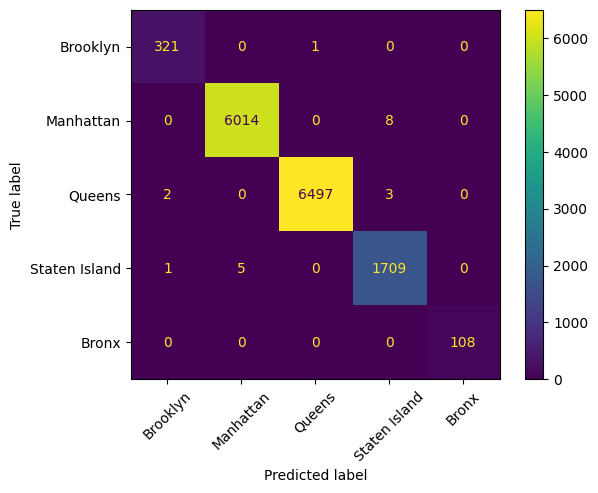

neighbourhood_group
Manhattan        6502
Brooklyn         6022
Queens           1715
Bronx             322
Staten Island     108
Name: count, dtype: int64


In [151]:
from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']) #ALPHABETICAL ORDER
cm_display.plot(values_format='d')
plt.xticks(rotation=45)
plt.show()

print(y_test.value_counts()) #USE THIS TO VERIFY YOUR PLOT

In [152]:
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

report_dict = metrics.classification_report(y_test_dummies, y_pred_dummies, target_names=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], output_dict=True)

from sklearn.metrics import classification_report

df_report = pd.DataFrame(report_dict)
df_report

,Brooklyn,Manhattan,Queens,Staten Island,Bronx,micro avg,macro avg,weighted avg,samples avg
precision,0.990741,0.999169,0.999846,0.993605,1.0,0.998637,0.996672,0.998640,0.998637
recall,0.996894,0.998672,0.999231,0.996501,1.0,0.998637,0.998260,0.998637,0.998637
f1-score,0.993808,0.998920,0.999538,0.995051,1.0,0.998637,0.997464,0.998638,0.998637
support,322.000000,6022.000000,6502.000000,1715.000000,108.0,14669.000000,14669.000000,14669.000000,14669.000000


In [153]:
# XGBoost needs the label in the format of [0, 1, 2, 3, ..., n - 1]. It can't handle categorical values
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit(y).transform(y) # This line converts the y from ['yes', 'no', 'no'] to [1, 0, 0], much like dummy coding
# Now we have to resplit the data with these encoded y values:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)

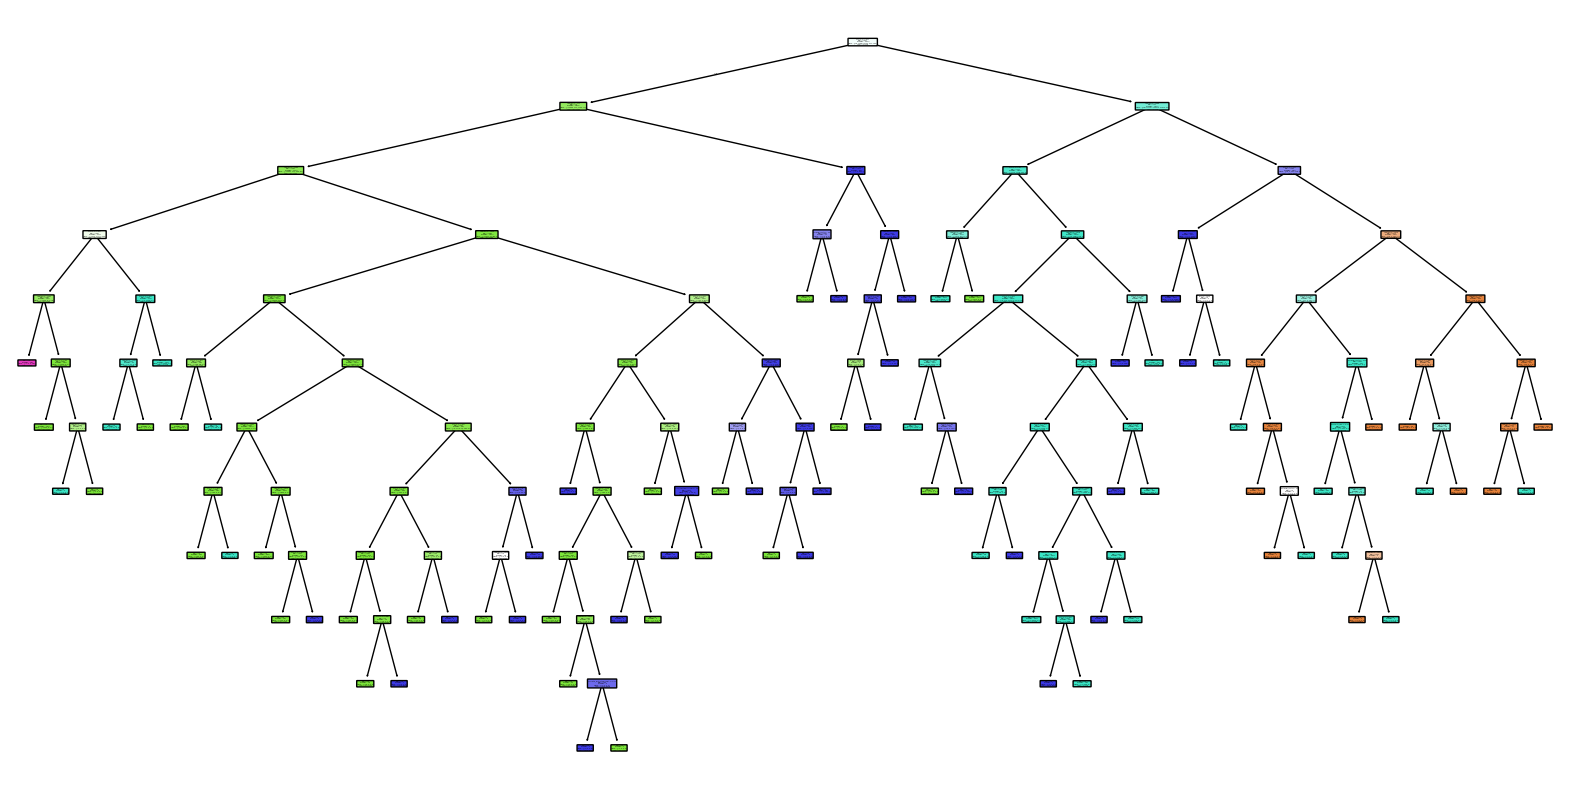

In [154]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  
plot_tree(clf, filled=True, feature_names=X.columns, 
          class_names=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'], 
          rounded=True)

plt.show()  # Display the plot

#Neither graphviz or pydotplus would work


#### Answer

##### This model appears to be highly accurate, as shown by the precision, recall, and F1-scores across all neighborhoods, which are all close to 1. For example, the precision for each neighborhood is above 0.99, indicating that the model is correctly predicting the neighborhood group in almost every case. The recall is also high, meaning the model is identifying most of the true instances of each neighborhood. The F1-scores further reinforce this, showing a balanced performance in terms of both precision and recall. These results suggest that the model is doing a great job of classifying the neighborhood group

In [155]:
from sklearn import preprocessing

y = df['price']
X = df.drop(columns=["price", 'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month'] )
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)      # Notice that each of the values were scaled to match overall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.357393,0.511921,0.000000,0.014308,0.015337,1.000000,1.0,0.0,0.0,0.0,1.0,0.0
1,0.614199,0.490469,0.000000,0.071542,0.003067,0.972603,0.0,1.0,0.0,0.0,0.0,0.0
2,0.748252,0.569257,0.001601,0.000000,0.000000,1.000000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.448496,0.535649,0.000000,0.429253,0.000000,0.531507,1.0,0.0,0.0,0.0,0.0,0.0
4,0.722820,0.565324,0.007206,0.014308,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


In [156]:
# Create Decision Tree Regressor object
from sklearn.tree import DecisionTreeRegressor


reg = DecisionTreeRegressor()

# Train Decision Tree Regressor
reg = reg.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = reg.predict(X_test)

In [157]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df

,Actual,Predicted
18907,60,180.0
46663,250,275.0
19757,80,100.0
9705,95,65.0
3322,450,280.0
...,...,...
12360,85,140.0
46855,150,73.0
37553,110,60.0
15102,72,75.0


In [158]:
reg.score(X_test, y_test)

-0.4052387106968687

In [159]:
from sklearn import metrics

print(f'R squared:\t{metrics.r2_score(y_test, y_pred)}')
print(f'MAE:\t\t{metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE:\t\t{metrics.mean_squared_error(y_test, y_pred)**(1/2)}')

R squared:	-0.4052387106968687
MAE:		83.95350739655055
RMSE:		287.8940731264401


In [160]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print(f'R squared:\t{metrics.r2_score(y_test, y_pred)}')
print(f'MAE:\t\t{metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE:\t\t{metrics.mean_squared_error(y_test, y_pred)**(1/2)}')

R squared:	0.0867677667968193
MAE:		74.33264125522129
RMSE:		232.08564946124028


#### Answer

##### Model 2, which uses a Decision Tree Regressor, isn't doing great based on the evaluation metrics. The negative R-squared value of -0.40 means the model is actually worse than just predicting the average price, so it’s not capturing the patterns in the data. The high MAE (84.38) and RMSE (287.16) show that the model is off by a lot when predicting prices. When I tried using Linear Regression instead, the R-squared improved a little to 0.09, but that’s still low, meaning the model isn’t explaining much of the price variation.

